Chapter 33
# 高斯混合聚类
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
from matplotlib.patches import Ellipse
# 定义可视化函数
def make_ellipses(gmm, ax):
    
    # 可视化不同簇
    for j in range(0,K):
        # 四种不同的协方差矩阵
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[j]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[j])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) 
            covariances = covariances*gmm.covariances_[j]
        
        # 用奇异值分解完成特征值分解
        U, S, V_T = np.linalg.svd(covariances)
        # 计算长轴、短轴长度
        major, minor = 2 * np.sqrt(S)
        # print('major: ',major)
        # print('minor: ',minor)
        
        # 计算椭圆长轴旋转角度
        angle = np.arctan2(U[1,0], U[0,0])
        angle = 180 * angle / np.pi  
        
        # 多元高斯分布中心
        ax.plot(gmm.means_[j, 0],gmm.means_[j, 1],
                 color = 'k',marker = 'x',markersize = 10)

        # 绘制半长轴向量
        ax.quiver(gmm.means_[j,0],gmm.means_[j,1],
                  U[0,0], U[1,0], scale = 5/major)
        # scale: Scales the length of the arrow inversely

        # 绘制半短轴向量
        ax.quiver(gmm.means_[j,0],gmm.means_[j,1], 
                  U[0,1], U[1,1], scale = 5/minor)
        
        # 绘制椭圆
        for scale in np.array([3, 2, 1]):

            ell = Ellipse(gmm.means_[j, :2], 
                          scale*major,
                          scale*minor, 
                          angle, 
                          color=rgb[j,:],
                          alpha = 0.18)
            ax.add_artist(ell)

C:\Users\james\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\james\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\james\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\james\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

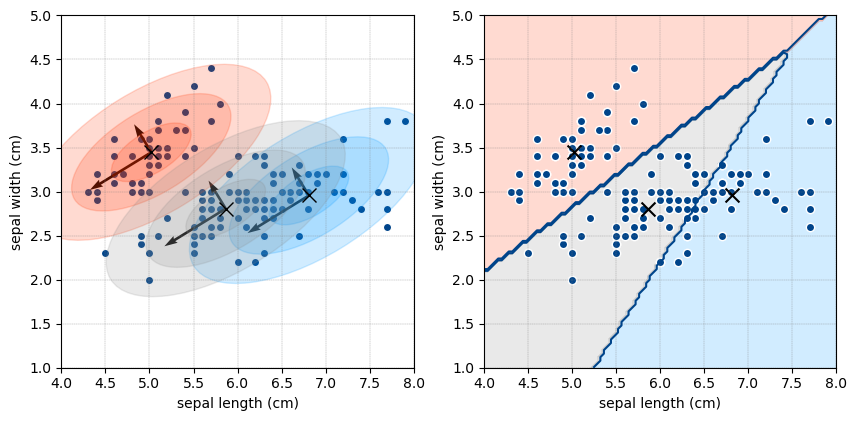

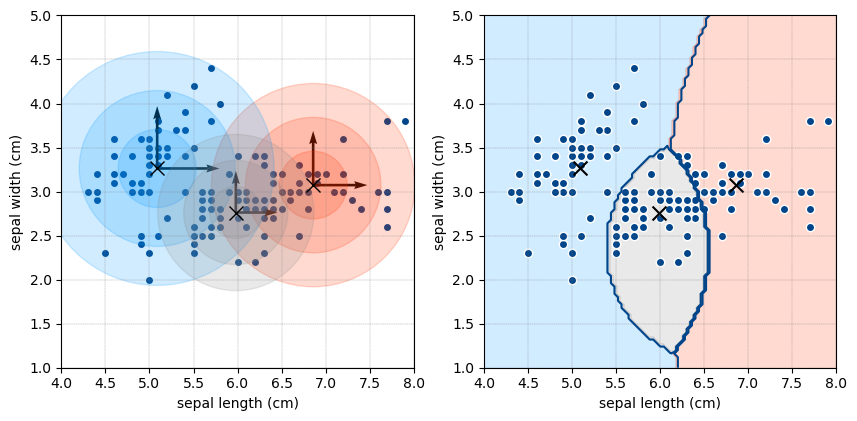

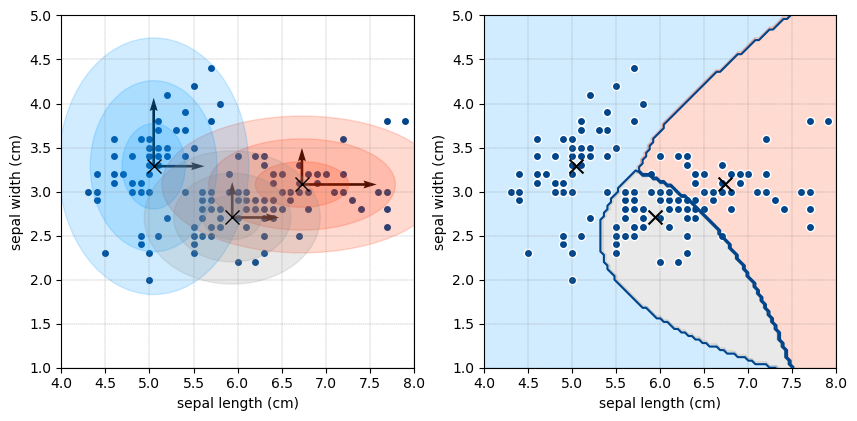

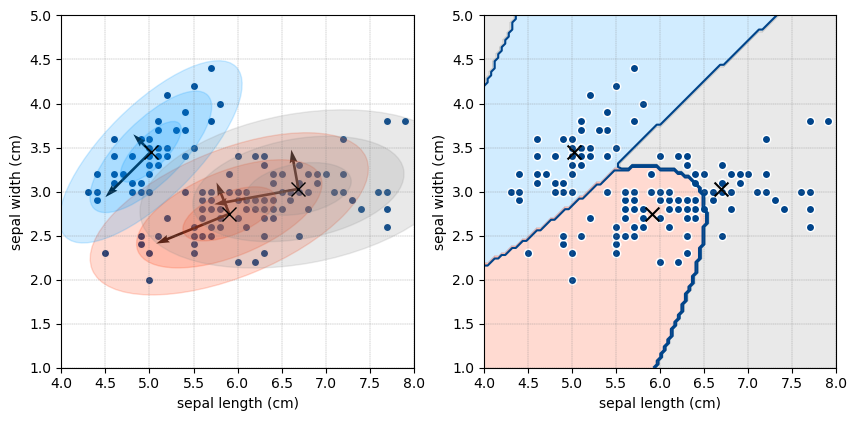

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# 创建色谱
rgb = [[255, 51, 0], 
       [0, 153, 255],
       [138,138,138]]
rgb = np.array(rgb)/255.
cmap_bold = ListedColormap(rgb)

# 生成网格化数据
x1_array = np.linspace(4,8,101)
x2_array = np.linspace(1,5,101)
xx1, xx2 = np.meshgrid(x1_array,x2_array)

# 鸢尾花数据
iris = datasets.load_iris(); X = iris.data[:, :2]

K = 3 # 簇数
# 协方差类型
covariance_types = ['tied', 'spherical', 'diag', 'full']

for covariance_type in covariance_types:
    # 采用GMM聚类
    gmm = GaussianMixture(n_components=K, 
                          covariance_type=covariance_type)
    gmm.fit(X)
    Z = gmm.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # 可视化
    fig = plt.figure(figsize = (10,5)) 
    ax = fig.add_subplot(1,2,1)
    ax.scatter(x=X[:, 0], y=X[:, 1], 
               color=np.array([0, 68, 138])/255., 
               alpha=1.0,
               linewidth = 1, edgecolor=[1,1,1])
    # 绘制椭圆和向量
    make_ellipses(gmm, ax)
    ax.set_xlim(4, 8); ax.set_ylim(1, 5)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, 
            color=[0.5,0.5,0.5])
    ax.set_aspect('equal', adjustable='box')

    ax = fig.add_subplot(1,2,2)
    ax.contourf(xx1, xx2, Z, cmap=cmap_bold, alpha = 0.18)
    ax.contour(xx1, xx2, Z, levels=[0,1,2], 
               colors=np.array([0, 68, 138])/255.)
    ax.scatter(x=X[:, 0], y=X[:, 1], 
               color=np.array([0, 68, 138])/255., 
               alpha=1.0,
               linewidth = 1, edgecolor=[1,1,1])
    centroids = gmm.means_
    ax.scatter(centroids[:, 0], centroids[:, 1], 
               marker="x", s=100, linewidths=1.5,
               color="k")    
    ax.set_xlim(4, 8); ax.set_ylim(1, 5)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, 
            color=[0.5,0.5,0.5])
    ax.set_aspect('equal', adjustable='box')
